In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]

In [ ]:
################################################################################################################
# In this part, we have performed filtering and transformation on the data that needs to be predicted.         #
# We have summed up the 'q_stone' and 'q_sand' columns to create 'q_stone_sum' and 'q_sand_sum' columns.       #
# Additionally, we have transformed the previous 'q_stone' and 'q_sand' columns into a binary data format      #
# similar to one-hot encoding.                                                                                 #
# Moreover, we have removed some columns that we believe have minimal impact:                                  #
# 'probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age', and 'slump.1'. #
################################################################################################################

In [2]:
###############################################################################################
columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age','slump.1']
df = df.drop(columns=columns_to_drop)
###############################################################################################
columns_to_binary = ['q_stone_1','q_stone_2','q_stone_3','q_crushed_sand','q_non_crushed_sand']
###############################################################################################
columns_to_sum_stone = ['q_stone_1', 'q_stone_2', 'q_stone_3']
columns_to_sum_sand = ['q_crushed_sand', 'q_non_crushed_sand']
###############################################################################################    
target_column= 'compressive_strength'
target_column1 = 'slump'

In [3]:
def map_to_binary(df, columns_to_binary):
    for column_name in columns_to_binary:
        df[column_name] = df[column_name].map(lambda x: 1 if x != 0 else 0)
    return df

In [4]:
def sum_columns(df, new_column, columns_to_sum):
    df[new_column] = df[columns_to_sum].sum(axis=1)
    return df

In [5]:
sum_columns(df, 'q_stone_sum', columns_to_sum_stone)
sum_columns(df, 'q_sand_sum', columns_to_sum_sand)

,density_fresh,density_at_test,q_cement,q_water,id_cement,cement_label,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,...,stone_type,slump,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength,q_stone_sum,q_sand_sum
5,2362.000906,0.000000,305.0,173.0,16.0,CEM_II_42.5_R/A-L,NaN,0.0,819.0,0.0,...,crushed_stone,14.0,NaN,NaN,NaN,NaN,NaN,0.000000,1050.0,819.0
11,2367.883847,0.000000,270.0,168.6,60.0,CEM_I_42.5_R,NaN,0.0,821.0,0.0,...,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,1077.0,821.0
17,2400.240024,0.000000,270.0,166.3,60.0,CEM_I_42.5_R,NaN,0.0,684.0,0.0,...,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,1214.0,684.0
23,2307.579102,2314.937454,225.0,252.8,60.0,CEM_I_42.5_R,NaN,0.0,819.0,75.0,...,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.426049,1079.0,819.0
24,2326.703259,2329.938876,225.0,252.8,60.0,CEM_I_42.5_R,NaN,0.0,819.0,75.0,...,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.800109,1079.0,819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,0.000000,2219.249350,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,15.748495,890.0,855.0
7486,0.000000,2219.227506,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,12.240642,890.0,855.0
7487,0.000000,2284.606742,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,8.295060,890.0,855.0
7489,0.000000,2248.794867,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,crushed_stone,16.0,0.0,0.0,0.0,0.0,0.01,21.916017,890.0,855.0


In [6]:
map_to_binary(df, columns_to_binary)
df

,density_fresh,density_at_test,q_cement,q_water,id_cement,cement_label,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,...,stone_type,slump,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength,q_stone_sum,q_sand_sum
5,2362.000906,0.000000,305.0,173.0,16.0,CEM_II_42.5_R/A-L,NaN,0,1,0.0,...,crushed_stone,14.0,NaN,NaN,NaN,NaN,NaN,0.000000,1050.0,819.0
11,2367.883847,0.000000,270.0,168.6,60.0,CEM_I_42.5_R,NaN,0,1,0.0,...,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,1077.0,821.0
17,2400.240024,0.000000,270.0,166.3,60.0,CEM_I_42.5_R,NaN,0,1,0.0,...,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,1214.0,684.0
23,2307.579102,2314.937454,225.0,252.8,60.0,CEM_I_42.5_R,NaN,0,1,75.0,...,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.426049,1079.0,819.0
24,2326.703259,2329.938876,225.0,252.8,60.0,CEM_I_42.5_R,NaN,0,1,75.0,...,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.800109,1079.0,819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,0.000000,2219.249350,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,1,1,0.0,...,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,15.748495,890.0,855.0
7486,0.000000,2219.227506,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,1,1,0.0,...,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,12.240642,890.0,855.0
7487,0.000000,2284.606742,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,1,1,0.0,...,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,8.295060,890.0,855.0
7489,0.000000,2248.794867,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,1,1,0.0,...,crushed_stone,16.0,0.0,0.0,0.0,0.0,0.01,21.916017,890.0,855.0


In [ ]:
######################################################################################################################### 
# In this part，we transformed all NaN values into 0.                                                                   #
# Additionally, we processed the 'cement_label' column, aiming to enhance the model's ability to extract information.   #
# We extracted the strength of the cement into a separate column.                                                       #
# The cement's type was transformed into one-hot encoded features.                                                      #
# Information about additives was aggregated into a new column, distinguished by numerical values.                      #
# Next, we addressed outliers in significant correlated columns.                                                        #
# This primarily involved handling missing values in the target prediction column                                       #
# and addressing anomalies in the density section.                                                                      #
#########################################################################################################################

In [7]:
def Encodding_cement_stone_type_fillna(df):
    if 'cement_label' in df.columns:
        df['cement_label'] = df['cement_label'].astype(str)
        df['CEM_id'] = df['cement_label'].apply(lambda x: 'CEM_I' if 'CEM_I_' in x else ('CEM_II' if 'CEM_II_' in x else ('CEM_III' if 'CEM_III_' in x else 'CEM_IV')))
        One_Hot_encoded_df = pd.get_dummies(df['CEM_id'], prefix='CEM_id')
        df['CEM_S'] = df['cement_label'].apply(lambda x: '42.5' if '42.5' in x else ('52.5' if '52.5' in x else ''))        
        df = pd.concat([df, One_Hot_encoded_df,], axis=1)
#############################################################################################################################
        roman_numeral_map = { 'I': 1, 'II':2, 'III': 3, 'IV': 4, 'N':1, 'R':2, 'N-SR':3, 'N/A-L':4, 'N/A-LL':5, 'N/B-M':6, 
                     'N/B-V':7, 'R/A-L':8, 'R/A-LL':9, 'R/A-M':10, 'R/B-LL':11, 'R/B-M':12, 'N/A-LH':13, 'N/A-S':14, 
                     'N-SR/A-S':15, 'N-SR/B-V':16
                    }
        def format_date(type_string_list):
            num = np.zeros((len(type_string_list), 1))
            i=0
            for type_string in type_string_list:
             parts = type_string.split('_')
             feature1 = 100*roman_numeral_map.get(parts[1], None)
             feature2 = float(parts[2])
             feature3 = 0.001*roman_numeral_map.get(parts[3], None)
             num[i] = feature1+feature2+feature3
             i+=1
            return num
        numeric_data = format_date(df['cement_label'])
        df['cement_label']= numeric_data
        df = df.copy() 
        df['stone_type'] = df['stone_type'].replace({'river_stone': 2, 'crushed_stone': 1,'':0})
#############################################################################################################################
        df = df.drop(columns=['CEM_id','cement_label'])
        df.fillna(0, inplace=True)
        df.replace('', 0, inplace=True) 
        return df
    else:
        print("DataFrame dosen't have 'cement_label'.")

In [8]:
###############################################################################################
df = Encodding_cement_stone_type_fillna(df)
df
###############################################################################################

,density_fresh,density_at_test,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,...,q_superplast,q_plast,compressive_strength,q_stone_sum,q_sand_sum,CEM_S,CEM_id_CEM_I,CEM_id_CEM_II,CEM_id_CEM_III,CEM_id_CEM_IV
5,2362.000906,0.000000,305.0,173.0,16.0,0.0,0,1,0.0,0.0,...,0.0,0.00,0.000000,1050.0,819.0,42.5,0,1,0,0
11,2367.883847,0.000000,270.0,168.6,60.0,0.0,0,1,0.0,0.0,...,0.0,0.00,0.000000,1077.0,821.0,42.5,1,0,0,0
17,2400.240024,0.000000,270.0,166.3,60.0,0.0,0,1,0.0,0.0,...,0.0,0.00,0.000000,1214.0,684.0,42.5,1,0,0,0
23,2307.579102,2314.937454,225.0,252.8,60.0,0.0,0,1,75.0,0.0,...,0.0,0.00,15.426049,1079.0,819.0,42.5,1,0,0,0
24,2326.703259,2329.938876,225.0,252.8,60.0,0.0,0,1,75.0,0.0,...,0.0,0.00,15.800109,1079.0,819.0,42.5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,0.000000,2219.249350,260.0,170.0,46.0,0.0,1,1,0.0,25.0,...,0.0,0.01,15.748495,890.0,855.0,42.5,0,1,0,0
7486,0.000000,2219.227506,260.0,170.0,46.0,0.0,1,1,0.0,25.0,...,0.0,0.01,12.240642,890.0,855.0,42.5,0,1,0,0
7487,0.000000,2284.606742,260.0,170.0,46.0,0.0,1,1,0.0,25.0,...,0.0,0.01,8.295060,890.0,855.0,42.5,0,1,0,0
7489,0.000000,2248.794867,260.0,170.0,46.0,0.0,1,1,0.0,25.0,...,0.0,0.01,21.916017,890.0,855.0,42.5,0,1,0,0


In [9]:
def Handling_density_fresh(df, target_column):
    df_filtered = df[(df['density_fresh'] < 3000) & (df[target_column] > 1) & (df['density_fresh'] > 1500)]
    return df_filtered

In [10]:
df=Handling_density_fresh(df,target_column)
df

,density_fresh,density_at_test,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,...,q_superplast,q_plast,compressive_strength,q_stone_sum,q_sand_sum,CEM_S,CEM_id_CEM_I,CEM_id_CEM_II,CEM_id_CEM_III,CEM_id_CEM_IV
23,2307.579102,2314.937454,225.0,252.80,60.0,0.0,0,1,75.00,0.0,...,0.000000,0.000000,15.426049,1079.00,819.0,42.5,1,0,0,0
24,2326.703259,2329.938876,225.0,252.80,60.0,0.0,0,1,75.00,0.0,...,0.000000,0.000000,15.800109,1079.00,819.0,42.5,1,0,0,0
30,2275.555556,2275.259259,225.0,212.00,60.0,0.0,0,1,75.00,0.0,...,0.000000,0.010000,23.528889,1079.00,819.0,42.5,1,0,0,0
31,2275.698158,2278.669043,225.0,212.00,60.0,0.0,0,1,75.00,0.0,...,0.000000,0.010000,24.545455,1079.00,819.0,42.5,1,0,0,0
37,2281.481481,2285.333333,300.0,220.00,60.0,0.0,0,1,0.00,0.0,...,0.000000,0.010000,27.840000,1079.00,819.0,42.5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,2322.962963,265.3,99.60,16.0,0.0,1,1,70.20,3.0,...,0.009765,0.009765,55.720000,949.90,906.1,52.5,1,0,0,0
7466,2306.666667,2231.111111,218.5,97.25,16.0,5.0,1,1,78.75,3.0,...,0.008562,0.008562,32.093333,909.25,1058.0,52.5,1,0,0,0
7467,2322.962963,2240.000000,218.5,97.25,16.0,5.0,1,1,78.75,3.0,...,0.008562,0.008562,33.111111,909.25,1058.0,52.5,1,0,0,0
7468,2322.147651,2246.085011,218.5,97.25,16.0,0.0,1,1,78.75,3.0,...,0.008562,0.008562,32.308725,909.25,1058.0,52.5,1,0,0,0


In [ ]:
############################################################################################################################
# In this section, we used a Random Forest model to select and remove columns with low correlation.                        #
# We exported this section as a '.py' file and used it for data preprocessing before starting the process of other models. #
############################################################################################################################

In [11]:
def useless_feature_from_Random_Forest(df,target_column,target_column1):
    df = df.drop(target_column1,axis=1)
    X = df.drop(target_column,axis=1)
    y = df[target_column] 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    param_grid = {'n_estimators': [50, 100, 20],'max_depth': [None, 2, 5],'max_features': ['auto', 'sqrt', 'log2'],
                  'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}    
    RFre = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=RFre, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print('best_params are:',best_params)
    final_RFre = RandomForestRegressor(**best_params)
    final_RFre.fit(X_train, y_train)
    y_pred = final_RFre.predict(X_test)
    variance = np.var(y_pred - y_test)
###############################################################################################################
    plt.figure(figsize=(15, 10))
    plt.scatter( y_test,y_pred,label='y_train and y_test')
    plt.xlabel(' y_test')
    plt.ylabel('y_pred')
    plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')
    plt.legend()
###############################################################################################################
    feature_importances = final_RFre.feature_importances_
    names = X_train.columns
    feature_importances = pd.DataFrame({'Feature': names, 'Importance': feature_importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    useless_feature = [feature_name for index, (feature_name, importance) in feature_importances.iterrows() if importance <= 0.005]
    print('useless_feature:',useless_feature)
    plt.bar(feature_importances['Feature'], feature_importances['Importance'])
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()
    return useless_feature

best_params are: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['q_non_crushed_sand', 'CEM_id_CEM_III', 'CEM_id_CEM_IV', 'q_waterproofing', 'q_retardant']


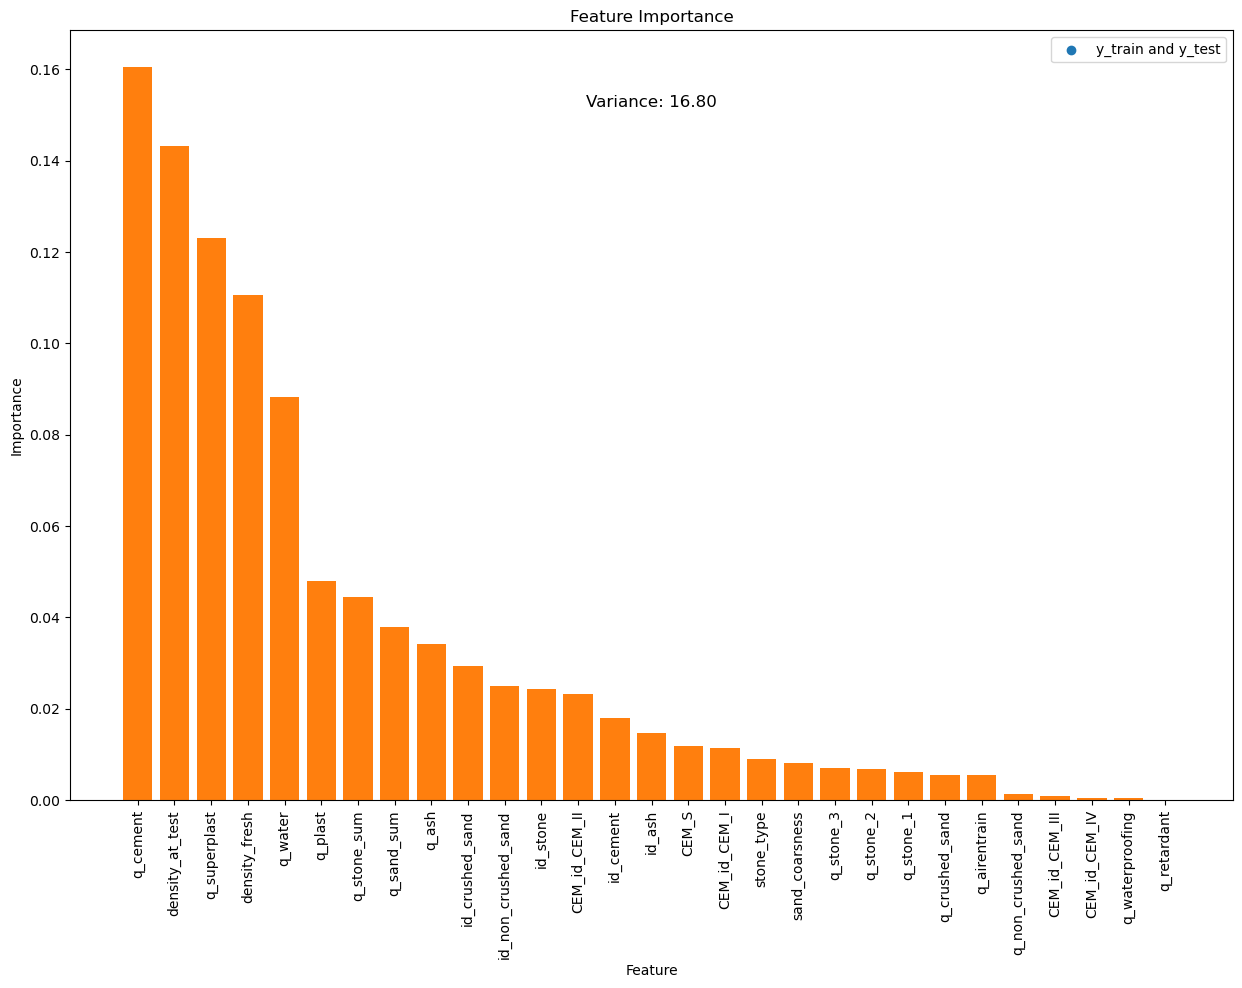

In [12]:
useless_feature = useless_feature_from_Random_Forest(df,target_column,target_column1)

In [13]:
df = df.drop(columns=useless_feature)
df

,density_fresh,density_at_test,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,...,slump,q_airentrain,q_superplast,q_plast,compressive_strength,q_stone_sum,q_sand_sum,CEM_S,CEM_id_CEM_I,CEM_id_CEM_II
23,2307.579102,2314.937454,225.0,252.80,60.0,0.0,0,75.00,0.0,65.0,...,15.5,0.0,0.000000,0.000000,15.426049,1079.00,819.0,42.5,1,0
24,2326.703259,2329.938876,225.0,252.80,60.0,0.0,0,75.00,0.0,65.0,...,15.5,0.0,0.000000,0.000000,15.800109,1079.00,819.0,42.5,1,0
30,2275.555556,2275.259259,225.0,212.00,60.0,0.0,0,75.00,0.0,65.0,...,17.5,0.0,0.000000,0.010000,23.528889,1079.00,819.0,42.5,1,0
31,2275.698158,2278.669043,225.0,212.00,60.0,0.0,0,75.00,0.0,65.0,...,17.5,0.0,0.000000,0.010000,24.545455,1079.00,819.0,42.5,1,0
37,2281.481481,2285.333333,300.0,220.00,60.0,0.0,0,0.00,0.0,65.0,...,17.0,0.0,0.000000,0.010000,27.840000,1079.00,819.0,42.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,2322.962963,265.3,99.60,16.0,0.0,1,70.20,3.0,19.0,...,0.0,0.0,0.009765,0.009765,55.720000,949.90,906.1,52.5,1,0
7466,2306.666667,2231.111111,218.5,97.25,16.0,5.0,1,78.75,3.0,19.0,...,0.0,0.0,0.008562,0.008562,32.093333,909.25,1058.0,52.5,1,0
7467,2322.962963,2240.000000,218.5,97.25,16.0,5.0,1,78.75,3.0,19.0,...,0.0,0.0,0.008562,0.008562,33.111111,909.25,1058.0,52.5,1,0
7468,2322.147651,2246.085011,218.5,97.25,16.0,0.0,1,78.75,3.0,19.0,...,0.0,0.0,0.008562,0.008562,32.308725,909.25,1058.0,52.5,1,0


In [ ]:
def data_processing(df, target_column, target_column1):
    columns_to_sum_stone = ['q_stone_1', 'q_stone_2', 'q_stone_3']
    columns_to_sum_sand = ['q_crushed_sand', 'q_non_crushed_sand']
    columns_to_binary = ['q_stone_1', 'q_stone_2', 'q_stone_3', 'q_crushed_sand', 'q_non_crushed_sand']
    sum_columns(df, 'q_stone_sum', columns_to_sum_stone)
    sum_columns(df, 'q_sand_sum', columns_to_sum_sand)
    map_to_binary(df, columns_to_binary)
    df = Encodding_cement_stone_type_fillna(df)
    df = Handling_density_fresh(df, target_column)
    useless_feature = useless_feature_from_Random_Forest(df, target_column, target_column1)
    df = df.drop(columns=useless_feature)
    return df

if __name__ == '__main__':
    file = '.\concrete_mix_design_simplified.csv'
    df = pd.read_csv(file)
    df = df[df['age'] >= 28]
    columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age', 'slump.1']
    df = df.drop(columns=columns_to_drop)
    
    target_column = 'compressive_strength'
    target_column1 = 'slump'

    processed_df = data_processing(df, target_column, target_column1)

    print(processed_df)
